In [5]:
import pandas as pd
%pylab inline
import SwitchingCoordination as sc
# %load_ext autoreload
# %autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [43]:
# initialize a parameter dictionary
params=sc.InitParams(N=6,switchingRate=0.1,
                     refTime=5.0,noiseStd=.5,
                     avgFrequency=0.0, writeFile=True)
params

{'N': 6,
 'couplingStrength': 1.0,
 'noiseStd': 0.5,
 'noiseAmplitude': 0.15811388300841897,
 'switchingRate': 0.1,
 'refTime': 5.0,
 'avgFrequency': 0.0,
 'stdFrequency': 0.0,
 'dt': 0.1,
 'simTime': 100.0,
 'simSteps': 1000,
 'outTime': 1.0,
 'outStep': 10,
 'writeFile': True}

In [46]:
#perform a single simulation
outData, data = sc.SingleSimulation(params)

[2 2 0 2 5 2]
[2 2 0 2 5 2]
[2 2 0 2 5 2]
[2 2 0 2 5 2]
[2 2 0 2 5 2]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 2 5 3]
[2 2 0 0 5 3]
[2 2 0 0 5 3]
[2 2 0 0 5 3]
[2 2 0 0 5 3]
[2 2 0 0 5 3]
[2 2 0 0 5 3]
[2 2 0 0 5 3]
[3 2 0 0 5 3]
[3 2 0 0 5 3]
[3 2 0 0 5 3]
[3 2 0 0 5 3]
[3 2 0 0 5 3]
[3 2 0 0 5 3]
[3 2 0 0 5 3]
[3 2 0 0 5 3]
[3 2 0 0 5 3]
[3 2 0

Text(0.2, 0.1, 'avg order = 0.607')

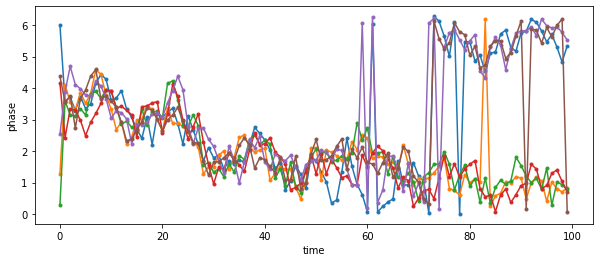

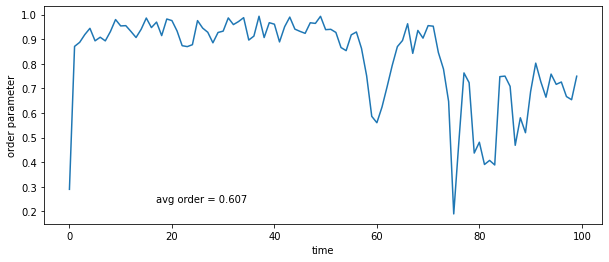

In [10]:
# plot single trajectories versus time
figure(figsize=(10,4))
plot(outData['t'],(outData['phi']),'.-')
xlabel('time')
ylabel('phase')
#plot order parameter versus time
figure(figsize=(10,4))
ax=subplot()
plot(outData['t'],outData['order'])
xlabel('time')
ylabel('order parameter')
avgorder=np.mean(outData['order'][-25:])
text(0.2,0.1,'avg order = %.3f' % avgorder,transform=ax.transAxes)

### Testing functions

Checking the network

[3 2 1 2 5 4]


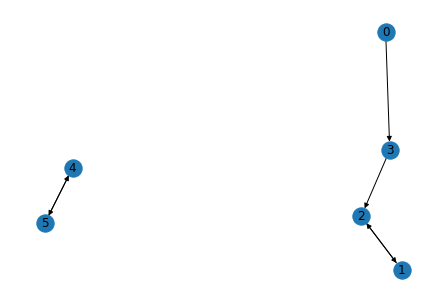

In [33]:
import networkx as nx
# make an empty directed graph with N nodes
G = nx.empty_graph(n=params['N'],create_using=nx.DiGraph())

# go through the neighbor list and add the corresponding directed edge
for node_i in range(G.number_of_nodes()):
    G.add_edge(*(node_i, data['neighbor'][node_i]))

print(data['neighbor'])
nx.draw(G, with_labels=True)


In [31]:
data['neighbor'][node_i]
Adjc = nx.adjacency_matrix(G)
Adjc.toarray()

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0]])

In [13]:
data,outdata=sc.InitData(params)
data

{'phi': array([0.78368066, 5.05067433, 2.63873017, 2.29459563, 3.46103083,
        3.10372364]),
 'omega': array([0., 0., 0., 0., 0., 0.]),
 'neighbor': array([4, 3, 1, 5, 5, 2], dtype=int32),
 'timer': array([-1., -1., -1., -1., -1., -1.]),
 'coupling': array([1., 1., 1., 1., 1., 1.])}

In [14]:
data['neighbor'],data['timer'],data['coupling']=sc.UpdateNetwork(data['neighbor'],
                                             data['timer'],
                 data['coupling'],
                 params['switchingRate'],
                 params['dt'],
                 params['N'],
                 params['refTime'],
                 params['couplingStrength'])

In [15]:
outData.keys()

dict_keys(['t', 'phi', 'neighbor', 'timer', 'order'])

In [16]:
sc.GenerateOutputString(params)

'N6-K1_0-R0_01-sigma0_5'

In [17]:
sc.Gensc.GenerateOutputString()sc.Gensc.GenerateOutputString()sc.Gensc.GenerateOutputString()sc.Gensc.GenerateOutputString()sc.Gensc.GenerateOutputString()sc.Gensc.GenerateOutputString()sc.Gensc.GenerateOutputString()sc.Gensc.GenerateOutputString()sc.Gensc.GenerateOutputString()params

SyntaxError: invalid syntax (963980630.py, line 1)

In [18]:
10 % 10

0

In [19]:
20 % 10

0

In [20]:
c=np.exp(1j*data['phi'][0])
c

(0.7083201948534563+0.705891281687741j)

In [21]:
phi=data['phi']

In [22]:
np.cos(phi),np.sin(phi),np.abs(c)

(array([ 0.70832019,  0.3318701 , -0.87620662, -0.66223625, -0.949412  ,
        -0.99928305]),
 array([ 0.70589128, -0.94332509,  0.48193563,  0.7492951 , -0.31403321,
         0.03785997]),
 1.0)

In [23]:
np.abs(np.mean(np.exp(1j*phi)))

0.42500119002276465

In [24]:
pd.DataFrame.from_dict()

TypeError: from_dict() missing 1 required positional argument: 'data'

In [25]:

saveDict={k:v for k,v in outData.items() if k in ['t','order'] }

In [26]:
saveDict.keys()

dict_keys(['t', 'order'])

In [27]:
df=pd.DataFrame.from_dict(saveDict)

In [28]:
sc.SaveResultsToFile(params,outData)

In [29]:
params#

{'N': 6,
 'couplingStrength': 1.0,
 'noiseStd': 0.5,
 'noiseAmplitude': 0.15811388300841897,
 'switchingRate': 0.01,
 'refTime': 5.0,
 'avgFrequency': 0.0,
 'stdFrequency': 0.0,
 'dt': 0.1,
 'simTime': 100.0,
 'simSteps': 1000,
 'outTime': 1.0,
 'outStep': 10,
 'writeFile': True}